# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [34]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../data/'

### 之前做過的處理

In [35]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [36]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [38]:
app_train['OWN_CAR_AGE'].value_counts().sort_index()

0.0     2134
1.0     5280
2.0     5852
3.0     6370
4.0     5557
5.0     3595
6.0     6382
7.0     7424
8.0     5887
9.0     5020
10.0    4806
11.0    4161
12.0    4257
13.0    4566
14.0    4594
15.0    3580
16.0    3355
17.0    2899
18.0    2418
19.0    1864
20.0    1527
21.0    1462
22.0    1250
23.0    1067
24.0    1150
25.0     865
26.0     580
27.0     483
28.0     542
29.0     397
        ... 
32.0     208
33.0     132
34.0     183
35.0     157
36.0     124
37.0      75
38.0      97
39.0      78
40.0      85
41.0      58
42.0      42
43.0      19
44.0      21
45.0      11
46.0       5
47.0       1
48.0       1
49.0       6
50.0       1
51.0       3
52.0       1
54.0      12
55.0       4
56.0       1
57.0       1
63.0       2
64.0    2443
65.0     891
69.0       1
91.0       2
Name: OWN_CAR_AGE, Length: 62, dtype: int64

In [39]:
app_train['OWN_CAR_AGE_SHIFT'] = app_train['OWN_CAR_AGE'] + 1
app_train['OWN_CAR_AGE_SHIFT'].value_counts().sort_index()

1.0     2134
2.0     5280
3.0     5852
4.0     6370
5.0     5557
6.0     3595
7.0     6382
8.0     7424
9.0     5887
10.0    5020
11.0    4806
12.0    4161
13.0    4257
14.0    4566
15.0    4594
16.0    3580
17.0    3355
18.0    2899
19.0    2418
20.0    1864
21.0    1527
22.0    1462
23.0    1250
24.0    1067
25.0    1150
26.0     865
27.0     580
28.0     483
29.0     542
30.0     397
        ... 
33.0     208
34.0     132
35.0     183
36.0     157
37.0     124
38.0      75
39.0      97
40.0      78
41.0      85
42.0      58
43.0      42
44.0      19
45.0      21
46.0      11
47.0       5
48.0       1
49.0       1
50.0       6
51.0       1
52.0       3
53.0       1
55.0      12
56.0       4
57.0       1
58.0       1
64.0       2
65.0    2443
66.0     891
70.0       1
92.0       2
Name: OWN_CAR_AGE_SHIFT, Length: 62, dtype: int64

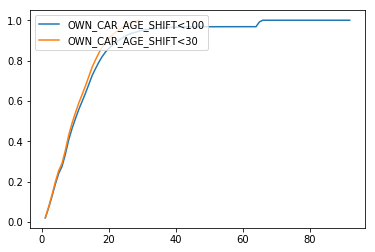

In [59]:
def show_column_ecdf(df, column_name, less_num):
    cdf = df[df[column_name]<less_num][column_name].value_counts().sort_index().cumsum()
    plt.plot(list(cdf.index), cdf/cdf.max(), label = str(column_name) + '<' + str(less_num))
    plt.legend(loc='upper left')
    
def show_column_ecdf_log(df, column_name, less_num):
    cdf = df[df[column_name]<less_num][column_name].value_counts().sort_index().cumsum()
    plt.plot(np.log(list(cdf.index)), cdf/cdf.max(), label = str(column_name) + '<' + str(less_num))
    plt.legend(loc='upper left')
    
def show_column_ecdf_log10(df, column_name, less_num):
    cdf = df[df[column_name]<less_num][column_name].value_counts().sort_index().cumsum()
    plt.plot(np.log10(list(cdf.index)), cdf/cdf.max(), label = str(column_name) + '<' + str(less_num))
    plt.legend(loc='upper left')
    
show_column_ecdf(app_train, 'OWN_CAR_AGE_SHIFT', 100)
show_column_ecdf(app_train, 'OWN_CAR_AGE_SHIFT', 30)

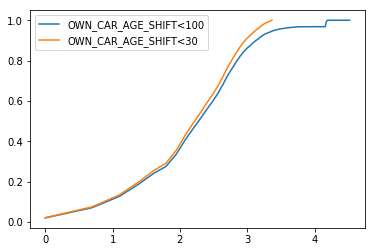

In [62]:
show_column_ecdf_log(app_train, 'OWN_CAR_AGE_SHIFT', 100)
show_column_ecdf_log(app_train, 'OWN_CAR_AGE_SHIFT', 30)

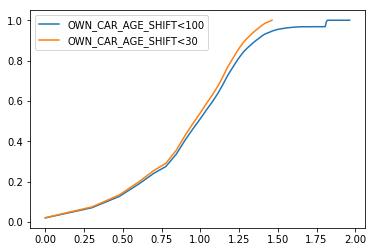

In [63]:
show_column_ecdf_log10(app_train, 'OWN_CAR_AGE_SHIFT', 100)
show_column_ecdf_log10(app_train, 'OWN_CAR_AGE_SHIFT', 30)

In [64]:
# 根據上面分析決定只取 own_car_age 60 以下的資料離散化
bins_arr = np.linspace(0, 60, 13, endpoint=True)
own_car_age_series = app_train["OWN_CAR_AGE"]
own_car_age_series_cut = pd.cut(own_car_age_series, bins = bins_arr, include_lowest = True)
own_car_age_series_cut.value_counts()

(5.0, 10.0]      29519
(-0.001, 5.0]    28788
(10.0, 15.0]     21158
(15.0, 20.0]     12063
(20.0, 25.0]      5794
(25.0, 30.0]      2328
(30.0, 35.0]       947
(35.0, 40.0]       459
(40.0, 45.0]       151
(50.0, 55.0]        20
(45.0, 50.0]        14
(55.0, 60.0]         2
Name: OWN_CAR_AGE, dtype: int64

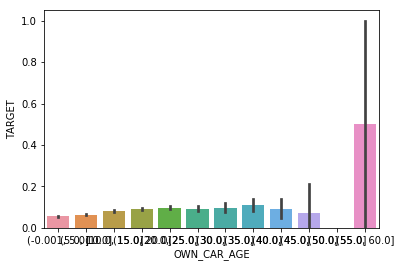

In [65]:
import seaborn as sns # 另一個繪圖-樣式套件
px = own_car_age_series_cut
py = app_train['TARGET']
sns.barplot(px, py)